In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random


In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
print(fashion_train_df.shape)
print(fashion_test_df.shape)

(60000, 785)
(10000, 785)


In [10]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

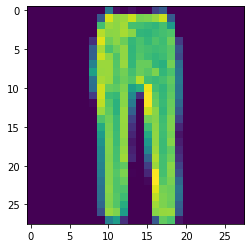

In [15]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image
#plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image on grey scale


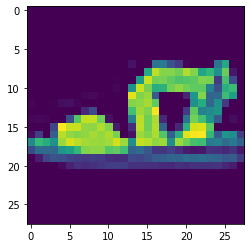

In [17]:
# Let's view some images!
i = random.randint(1,10000) # select any random index from 1 to 60,000
plt.imshow( testing[i,1:].reshape((28,28)) ) # reshape and plot the image

#plt.imshow( testing[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image on grey scale


In [18]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255  
y_train = training[:,0]

# We dividing by 255 to make normalization

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [19]:
# Import train_test_split from scikit library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()
model.add(Dense(784,activation='relu', input_shape=(784,)))
model.add(Dense(342,activation='relu'))
model.add(Dense(171,activation='relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 342)               268470    
_________________________________________________________________
dense_2 (Dense)              (None, 171)               58653     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1720      
Total params: 944,283
Trainable params: 944,283
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [26]:
epochs = 10

history = model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2469 - acc: 0.9074
Epoch 2/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2394 - acc: 0.9103
Epoch 3/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2259 - acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2185 - acc: 0.9178
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2051 - acc: 0.9230
Epoch 6/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2009 - acc: 0.9238
Epoch 7/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.1922 - acc: 0.9270
Epoch 8/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1804 - acc: 0.9320
Epoch 9/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1762 - acc: 0.9333
Epoch 10/10
60000/60000 [=====================

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc )

10000/10000 [==============================] - 1s 112us/sample - loss: 0.3168 - acc: 0.8920
Test Loss:  0.31677408385276795
Test Accuracy: 0.892
